In [5]:
import numpy as np
from PIL import Image

In [ ]:
def get_image_pixels(img_path):
    pixels = []
    img = Image.open(img_path)
    rgb_im = img.convert('RGB')
    for i in range(0, img.width):
        row = []
        for j in range(0, img.height):
            r, g, b = rgb_im.getpixel((i, j))
            row.append([r, g, b])
        pixels.append(row)
    return pixels

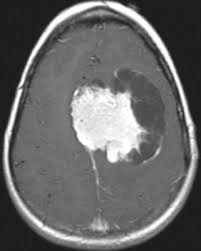

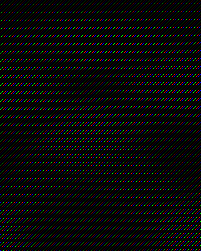

In [26]:
tumor = Image.open("data/dataset/107.jpg").convert("RGB")
display(tumor)

tumor2 = []
for i in range(tumor.width):
    row = []
    for j in range(tumor.height):
        r, g, b = tumor.getpixel((i, j))
        row.append(np.array([r, g, b]))
    tumor2.append(np.array(row))

tumor2 = np.array(tumor2)
# print(tumor2)
tumor2 = Image.fromarray(tumor2, "RGB")
display(tumor2)

In [28]:
def in_bounds(img, i, j):
    width, height = img.size
    return i >= 0 and i < width and j >= 0 and j < height

In [29]:
def get_neighbors(img, i, j, radius):
    neighbors = []
    for r in range(1, radius + 1):
        if in_bounds(img, i - r, j): # arriba
            neighbors.append((i - r, j))
        if in_bounds(img, i - r, j + r): # arriba derecha
            neighbors.append((i - r, j + r))
        if in_bounds(img, i, j + r): # derecha
            neighbors.append((i, j + r))
        if in_bounds(img, i + r, j + r): # abajo derecha
            neighbors.append((i + r, j + r))
        if in_bounds(img, i + r, j): # abajo
            neighbors.append((i + r, j))
        if in_bounds(img, i + r, j - r): # abajo a la izquierda
            neighbors.append((i + r, j - r))
        if in_bounds(img, i, j - r): # izquierda
            neighbors.append((i, j - r))
        if in_bounds(img, i - r, j - r): # arriba a la izquierda
            neighbors.append((i - r, j - r))
    return neighbors

In [ ]:
def get_density(img, i, j, t):
    neighbors = get_neighbors(img, i, j, 1)

In [ ]:
def dbscan(img_path, t, r, eps):
    img = Image.open(img_path)
    width, height = img.size
    visited = [[False for _ in range(height)] for _ in range(width)]
    cluster = [[-1 for _ in range(height)] for _ in range(width)]
    cur_cluster = 0
    for i in range(width):
        for j in range(height):
            if visited[i][j]:
                continue
            visited[i][j] = True
            den = get_density(img, i, j, t)
            if den > eps:
                cluster[i][j] = cur_cluster
                cur_cluster += 1
                neighbors = get_neighbors(img, i, j, r)
                while len(neighbors) > 0:
                    n_i, n_j = neighbors.pop()
                    if visited[n_i][n_j]:
                        continue
                    visited[n_i][n_j] = True
                    den = get_density(img, n_i, n_j, t)
                    if den > eps:
                        cluster[n_i][n_j] = cluster[i][j]
                        new_neighbors = get_neighbors(img, n_i, n_j, r)
                        for new_neighbor in new_neighbors:
                            neighbors.append(new_neighbor)
            else:
                cluster[i][j] = -1
    return cluster